In [9]:
import MeCab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data_tweet = pd.read_csv('data/tweets.tsv', sep="\t")
data_tweet = data_tweet.dropna()
y = data_tweet.iloc[:, 1].values

tagger = MeCab.Tagger()
tagger.parse('')

def word_tokenize(texts):
    node = tagger.parseToNode(texts)
    word_list = []
    while node:
        word_type = node.feature.split(",")[0]
        if (word_type == '名詞')|(word_type == '形容詞'):
            word = node.feature.split(",")[6]
            if word != '*':
                word_list.append(word)
        node = node.next
    return word_list

vectorizer = TfidfVectorizer(tokenizer=word_tokenize)
tweet_matrix = vectorizer.fit_transform(data_tweet.iloc[:,0])
X = tweet_matrix.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
clf = RandomForestClassifier(n_estimators=50, max_depth=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9337016574585635


([<matplotlib.axis.YTick at 0x1a2a3e0150>,
 <a list of 11 Text yticklabel objects>)

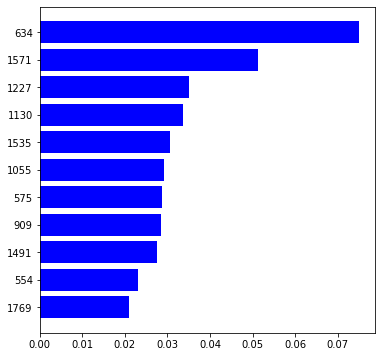

In [10]:
words_list = vectorizer.get_feature_names()
features = np.array(np.arange(0, len(words_list)))
importances = clf.feature_importances_

indices = np.argsort(importances)[-11:]
plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])

In [11]:
for i in indices:
    print(i, words_list[i])

1769 解説
554 中
1491 犬
909 基礎
575 予約
1055 年賀状
1535 発売
1130 情報
1227 新刊
1571 研究所
634 会社
